In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from scipy.sparse import vstack
from torchsummary import summary
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error




# 1. Data Import and Exploration

In [89]:
# load the provided CSV file
df = pd.read_csv("filtered_vacancies_dataset_uruguay.csv")
df

,year,EdadDesde,EdadHasta,CantidadPuestosVacantes,Confidencial,AreaEstudio1,IdIdioma1,isco_2dig_pred,Sexo,JornadaLaboral,...,cogn_writing,cogn_manage,social_character,social_social,social_peoplemanage,social_customer,manual_fingerdexterity,manual_coordination,manual_physical,Sueldo
0,2023.0,24.0,70.0,1,1.0,NaN,Español,33.0,NaN,Completa,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,52500.000000
1,2023.0,24.0,70.0,1,1.0,NaN,Español,33.0,NaN,Completa,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,52500.000000
2,2022.0,18.0,40.0,6,0.0,NaN,Español,52.0,NaN,Medio turno tarde,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,23291.228664
3,2022.0,18.0,40.0,6,0.0,NaN,Español,52.0,NaN,Completa,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,31760.766360
4,2012.0,18.0,45.0,3,1.0,NaN,NaN,52.0,NaN,NaN,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,34398.075109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28626,2021.0,28.0,40.0,2,1.0,NaN,Español,52.0,NaN,Completa,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,34652.387160
28627,2021.0,18.0,45.0,1,1.0,Óptica,NaN,33.0,NaN,Indiferente,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60641.677530
28628,2021.0,18.0,46.0,1,1.0,Óptica,NaN,33.0,NaN,Indiferente,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63529.376460
28629,2011.0,NaN,NaN,1,0.0,Óptica,NaN,52.0,NaN,NaN,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,51287.656100


In [90]:
# print the shape and column names
print(df.shape)

print(df.columns)

(28631, 30)
Index(['year', 'EdadDesde', 'EdadHasta', 'CantidadPuestosVacantes',
       'Confidencial', 'AreaEstudio1', 'IdIdioma1', 'isco_2dig_pred', 'Sexo',
       'JornadaLaboral', 'NombreNivelJerarquico', 'num_words',
       'highest_GradoEstudio', 'section_ciiu', 'cogn_core', 'cogn_soph',
       'cogn_comp', 'cogn_software', 'cogn_mlai', 'cogn_finance',
       'cogn_writing', 'cogn_manage', 'social_character', 'social_social',
       'social_peoplemanage', 'social_customer', 'manual_fingerdexterity',
       'manual_coordination', 'manual_physical', 'Sueldo'],
      dtype='object')


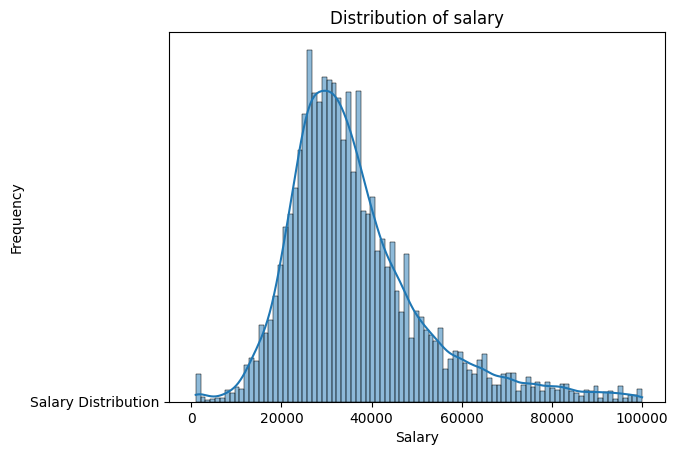

In [91]:
# visualize the distribution of the target variable 

sns.histplot(df["Sueldo"], kde=True)
plt.plot("Salary Distribution")
plt.title("Distribution of salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

In [92]:
# visualize summary statistics
df.describe()

,year,EdadDesde,EdadHasta,CantidadPuestosVacantes,Confidencial,isco_2dig_pred,num_words,cogn_core,cogn_soph,cogn_comp,...,cogn_writing,cogn_manage,social_character,social_social,social_peoplemanage,social_customer,manual_fingerdexterity,manual_coordination,manual_physical,Sueldo
count,28631.000000,27739.000000,27654.000000,28631.000000,28631.000000,28611.000000,28631.000000,28630.000000,28630.000000,28630.000000,...,28630.000000,28630.000000,28630.000000,28630.000000,28630.000000,28630.000000,28630.000000,28630.000000,28630.000000,28631.000000
mean,2017.104886,21.896355,42.232480,2.034718,0.508749,48.248121,78.469666,0.328362,0.148306,0.321202,...,0.057422,0.017324,0.290919,0.389696,0.072441,0.500733,0.037723,0.145058,0.043940,36461.834217
std,4.037564,4.004482,12.568744,3.524474,0.499932,20.279371,69.800923,0.469625,0.355409,0.466946,...,0.232652,0.130480,0.454194,0.487690,0.259222,0.500008,0.190528,0.352165,0.204965,15476.282579
min,2010.000000,0.000000,0.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000
25%,2014.000000,18.000000,33.000000,1.000000,0.000000,33.000000,35.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26219.053272
50%,2017.000000,21.000000,40.000000,1.000000,1.000000,43.000000,59.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,33241.143132
75%,2021.000000,25.000000,50.000000,2.000000,1.000000,52.000000,100.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,42736.366461
max,2023.000000,58.000000,70.000000,30.000000,1.000000,96.000000,767.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100000.000000


Histograms for continuous features



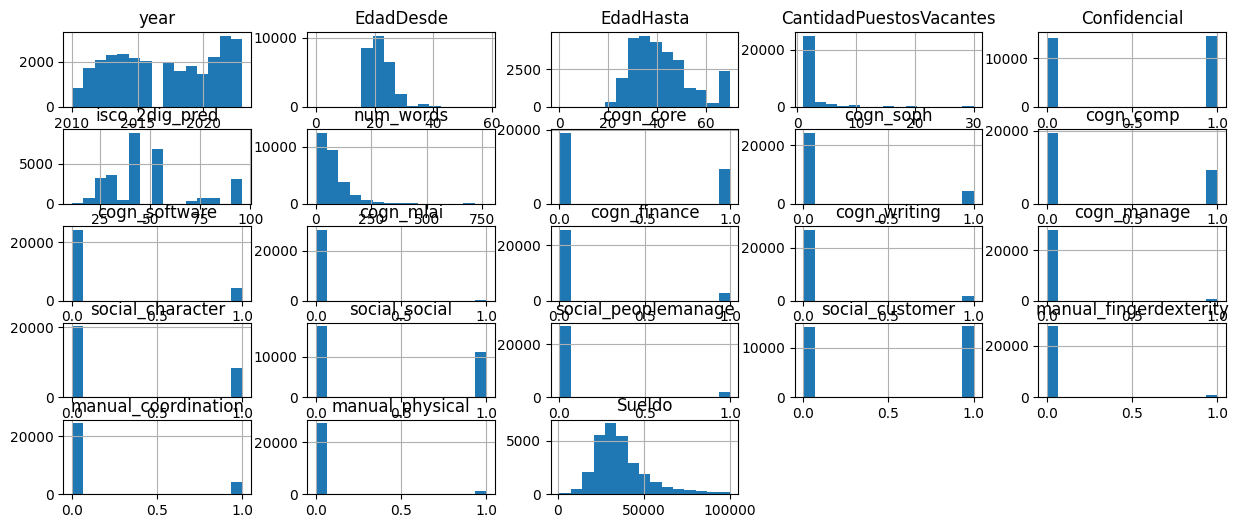

Count plots for categorical features



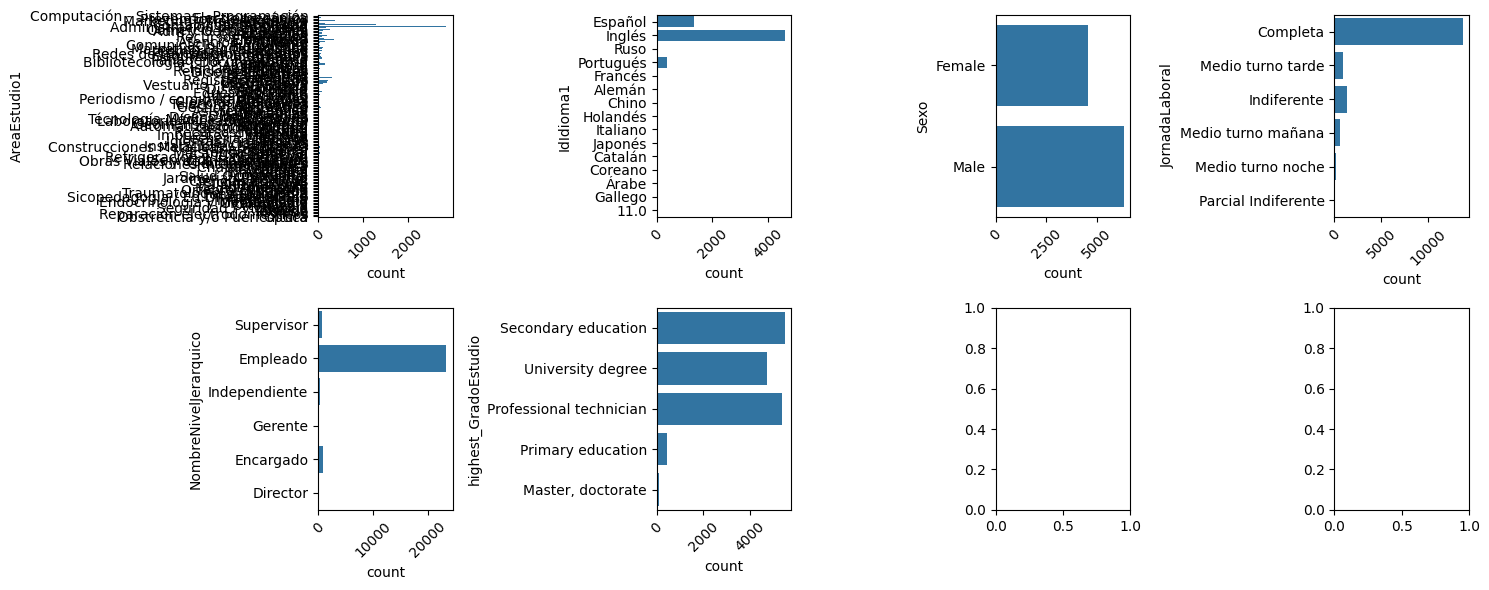

Correlation matrix



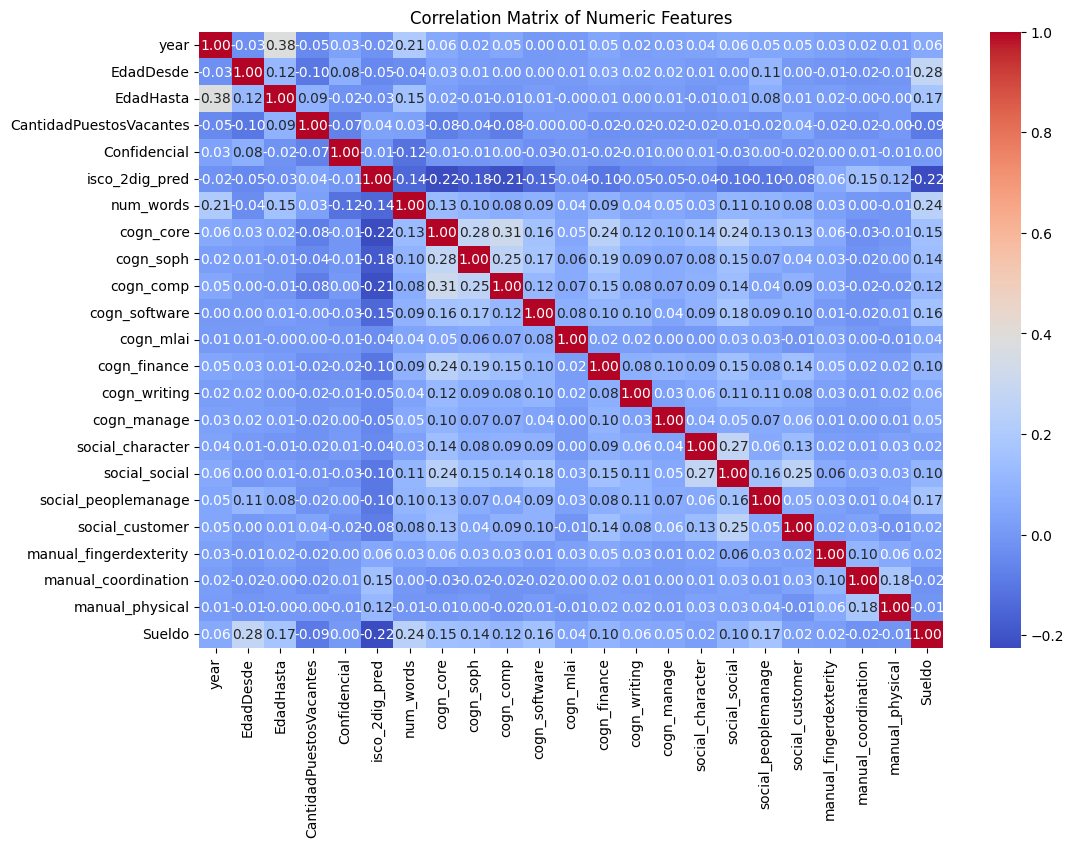

In [93]:
# perform EDA


# separate categorical and continous features
categorical_features = [col for col in df.columns if df[col].dtype == "object"]
continuous_features = [col for col in df.columns if col not in categorical_features]

# Visualize summary statistics (for numerical variables only)
df.describe()

# Set the aesthetics for better visibility
#sns.set(style="whitegrid")

# Histograms for continuous features
print('Histograms for continuous features\n')
df[continuous_features].hist(bins=15, figsize=(15, 6))
plt.show()


# Count plots for categorical features
print('Count plots for categorical features\n')
fig, ax = plt.subplots(2, 4, figsize=(15, 6))  # Adjust shape according to number of categorical features
for var, subplot in zip(categorical_features[:-1], ax.flatten()):
    sns.countplot(df[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()
plt.show()

# Exclude non-numeric columns and compute the correlation matrix
numeric_data = df.select_dtypes(include=[np.number])  # This only includes numeric columns
corr_matrix = numeric_data.corr()

# Plot the correlation matrix
print('Correlation matrix\n')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [94]:
# check for missing value 
print(df.info())

# display the column names that have missing values
missing_columns = df.columns[df.count() < len(df)]
print(missing_columns.tolist())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28631 entries, 0 to 28630
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     28631 non-null  float64
 1   EdadDesde                27739 non-null  float64
 2   EdadHasta                27654 non-null  float64
 3   CantidadPuestosVacantes  28631 non-null  int64  
 4   Confidencial             28631 non-null  float64
 5   AreaEstudio1             10180 non-null  object 
 6   IdIdioma1                6435 non-null   object 
 7   isco_2dig_pred           28611 non-null  float64
 8   Sexo                     10862 non-null  object 
 9   JornadaLaboral           16619 non-null  object 
 10  NombreNivelJerarquico    25468 non-null  object 
 11  num_words                28631 non-null  float64
 12  highest_GradoEstudio     16131 non-null  object 
 13  section_ciiu             24630 non-null  object 
 14  cogn_core             

According to the below boxplots, some numeric columns have outliers that appear above or below the red line in each boxplot. The number above each boxplot shows the number of outliers.

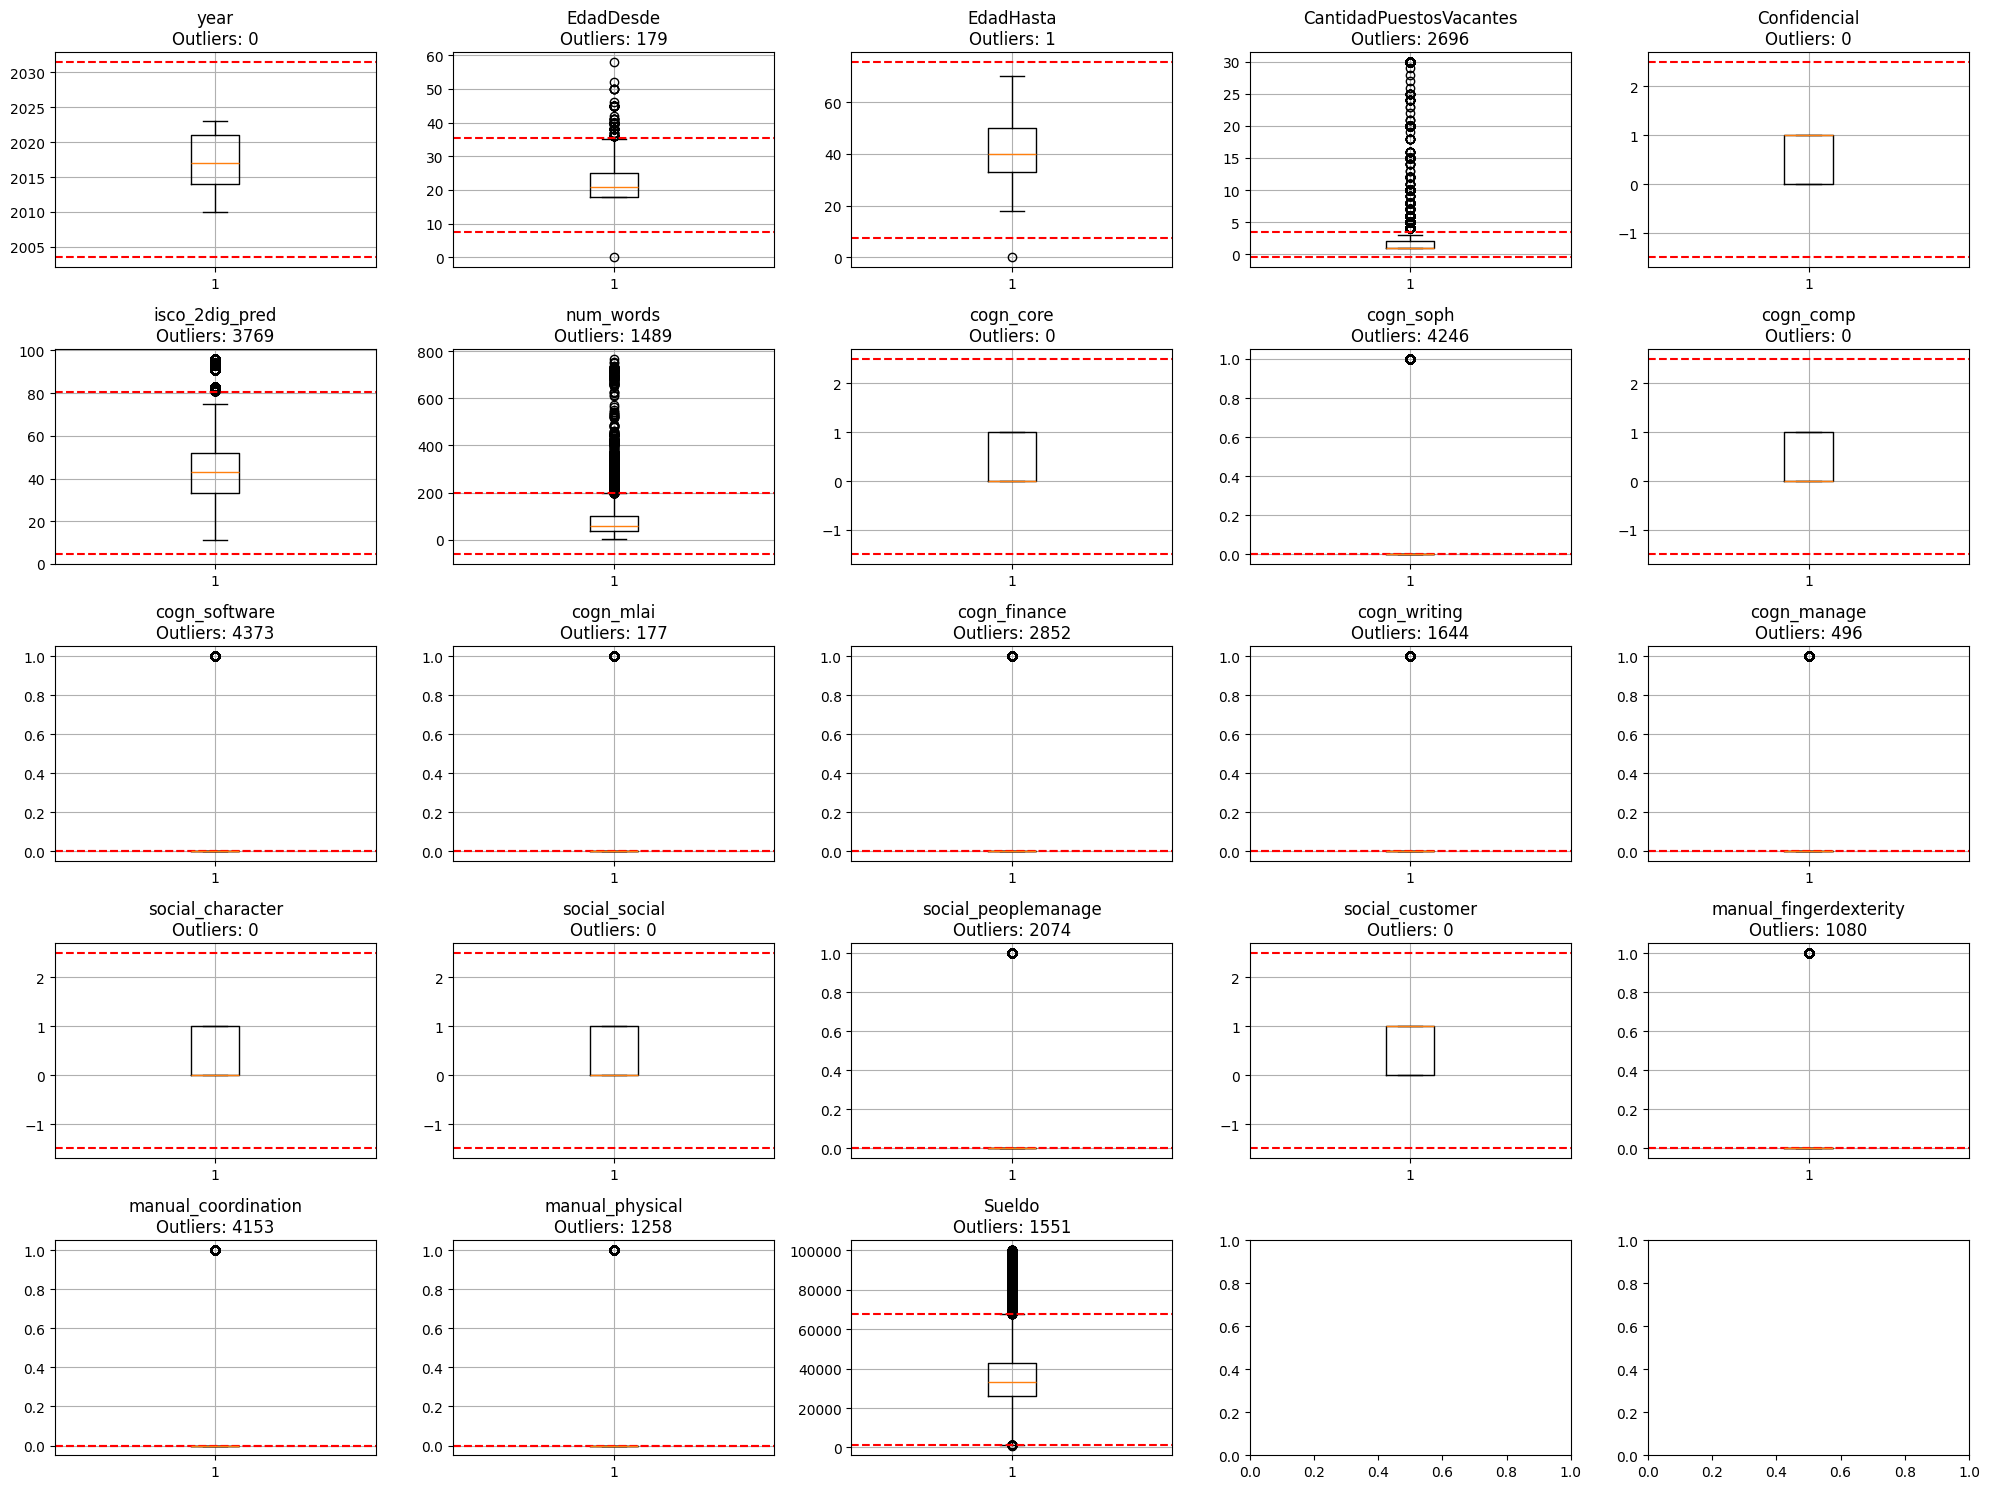

In [ ]:
# Outlier detection (basic)
def outlier_count(data, col_name, ax=None):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col_name] < lower_bound) | (data[col_name] > upper_bound)]
    
    # display boxplots
    if ax is not None:
        ax.boxplot(data[col_name].dropna())
        ax.axhline(lower_bound, color="red", linestyle="--", label="Lower Bound")
        ax.axhline(upper_bound, color="red", linestyle="--", label="Upper Bound")
        ax.set_title(f"{col_name}\nOutliers: {len(outliers)}")
        ax.grid(True)
   
    return col_name, len(outliers)

def plot_outliers_grid(data, continuous_features):
    fig, axes = plt.subplots(5, 5, figsize=(20, 15))
    axes = axes.flatten()

    for i, col in enumerate(continuous_features):
        outlier_count(data, col, ax=axes[i])     

    plt.tight_layout()
    plt.show()

plot_outliers_grid(df, continuous_features)


# 2. Data Preprocessing

In [ ]:
# handle missing values

# Fill numerical missing values with median
for col in continuous_features:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)
# Fill categorical missing values with mode
for col in categorical_features:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

In [ ]:
# one-hot encoding
data_encoded = pd.get_dummies(df, columns=categorical_features)

# convert boolean columns to integers
for col in data_encoded.columns:
    if data_encoded[col].dtype == bool:
        data_encoded[col] = data_encoded[col].astype(int)
        
# Log-transform salary
data_encoded['log_sueldo'] = np.log(data_encoded['Sueldo'])

# Features and target
X = data_encoded.drop(columns=['Sueldo', 'log_sueldo'])
y = data_encoded['log_sueldo']

# split the data into train, validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# redefine "continuous_features" because it included "Sueldo", which is target variable 
continuous_features = [col for col in continuous_features if col != 'Sueldo']

# fit scaler only on training set and continous fetures 
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_val_scaled[continuous_features] = scaler.transform(X_val[continuous_features])
X_test_scaled[continuous_features] = scaler.transform(X_test[continuous_features])


# Convert to torch tensors 
def to_tensor(X_df, y_array):
    X_tensor = torch.tensor(X_df.values.astype(np.float32)) 
    y_tensor = torch.tensor(y_array.values.astype(np.float32)) 
    return X_tensor, y_tensor

X_train_tensor, y_train_tensor = to_tensor(X_train_scaled, y_train)
X_val_tensor, y_val_tensor = to_tensor(X_val_scaled, y_val)
X_test_tensor, y_test_tensor = to_tensor(X_test_scaled, y_test)

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_24832\75655273.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_encoded['log_sueldo'] = np.log(data_encoded['Sueldo'])


# 3. MLP Model Building and Training 

In [138]:
import sys
!{sys.executable} -m pip install torchsummary


^C



[notice] A new release of pip is available: 24.1.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Model 1

In [ ]:
# Set up device (is available use GPU to speed up computations)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Define MLP for regression
class MLP_regression(nn.Module):
    def __init__(self):
        super(MLP_regression, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train_tensor.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.layers(x)

model_1 = MLP_regression().to(device)


#summary of model structure
summary(model_1, input_size=(X_train_tensor.shape))

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 20041, 64]          13,248
              ReLU-2            [-1, 20041, 64]               0
            Linear-3             [-1, 20041, 8]             520
              ReLU-4             [-1, 20041, 8]               0
            Linear-5             [-1, 20041, 1]               9
Total params: 13,777
Trainable params: 13,777
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 15.75
Forward/backward pass size (MB): 22.17
Params size (MB): 0.05
Estimated Total Size (MB): 37.97
----------------------------------------------------------------


Epoch: 1, Training Loss: 74.7143, Validation Loss: 21.1604
Epoch: 2, Training Loss: 2.8872, Validation Loss: 0.2499
Epoch: 3, Training Loss: 0.2212, Validation Loss: 0.2006
Epoch: 4, Training Loss: 0.1889, Validation Loss: 0.1788
Epoch: 5, Training Loss: 0.1737, Validation Loss: 0.1670
Epoch: 6, Training Loss: 0.1643, Validation Loss: 0.1597
Epoch: 7, Training Loss: 0.1591, Validation Loss: 0.1546
Epoch: 8, Training Loss: 0.1546, Validation Loss: 0.1516
Epoch: 9, Training Loss: 0.1516, Validation Loss: 0.1496
Epoch: 10, Training Loss: 0.1493, Validation Loss: 0.1465
Epoch: 11, Training Loss: 0.1476, Validation Loss: 0.1450
Epoch: 12, Training Loss: 0.1463, Validation Loss: 0.1440
Epoch: 13, Training Loss: 0.1452, Validation Loss: 0.1446
Epoch: 14, Training Loss: 0.1443, Validation Loss: 0.1434
Epoch: 15, Training Loss: 0.1442, Validation Loss: 0.1425
Epoch: 16, Training Loss: 0.1434, Validation Loss: 0.1431
Epoch: 17, Training Loss: 0.1425, Validation Loss: 0.1424
Epoch: 18, Training L

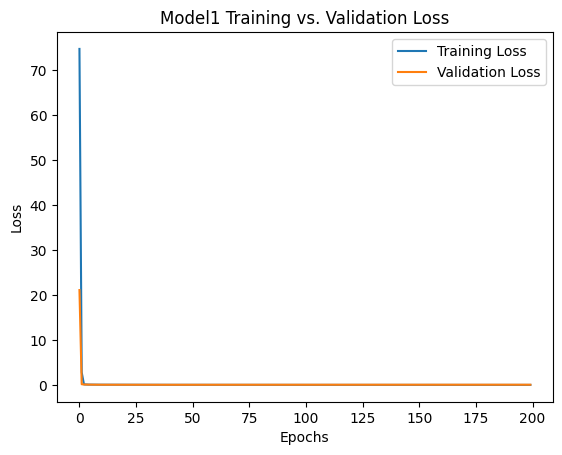

In [ ]:
#hyperparameter
lr = 0.0005
batch_size = 128

#training parameter
epochs = 200

#training model function
def train_model(epochs, model, optimizer, criterion, train_loader, val_loader):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target.view(-1, 1))
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_losses.append(train_loss / len(train_loader))

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output, target.view(-1, 1))
                val_loss += loss.item()
        val_losses.append(val_loss / len(val_loader))
        print(f'Epoch: {epoch+1}, Training Loss: {train_loss / len(train_loader):.4f}, Validation Loss: {val_loss / len(val_loader):.4f}')

    return train_losses, val_losses

# Create TensorDatasets and DataLoaders for Training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#Loss Function
criterion = nn.MSELoss()

# Instantiate optimizer and early stopper
optimizer = optim.Adam(model_1.parameters(), lr=lr)


# Run training and plot losses
train_losses_1, val_losses_1 = train_model(epochs, model_1, optimizer, criterion, train_loader, test_loader)
plt.plot(train_losses_1, label='Training Loss')
plt.plot(val_losses_1, label='Validation Loss')
plt.title("Model1 Training vs. Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Model 2

In [ ]:
# Set up device (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Define an improved MLP model for regression
class MLP_Improved(nn.Module):
    def __init__(self):
        super(MLP_Improved, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train_tensor.shape[1], 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.layers(x)
    

# Initialize model and move to device
model_2 = MLP_Improved().to(device)

# Display model summary
summary(model_2, input_size=(X_train_tensor.shape[1],))

Using device: cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]          26,496
       BatchNorm1d-2                  [-1, 128]             256
         LeakyReLU-3                  [-1, 128]               0
           Dropout-4                  [-1, 128]               0
            Linear-5                   [-1, 64]           8,256
       BatchNorm1d-6                   [-1, 64]             128
         LeakyReLU-7                   [-1, 64]               0
           Dropout-8                   [-1, 64]               0
            Linear-9                   [-1, 32]           2,080
        LeakyReLU-10                   [-1, 32]               0
           Linear-11                    [-1, 1]              33
Total params: 37,249
Trainable params: 37,249
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB

Epoch: 1, Training Loss: 3.9020, Validation Loss: 0.7785
Epoch: 2, Training Loss: 0.8164, Validation Loss: 0.4798
Epoch: 3, Training Loss: 0.7315, Validation Loss: 0.3724
Epoch: 4, Training Loss: 0.6573, Validation Loss: 0.2793
Epoch: 5, Training Loss: 0.6097, Validation Loss: 0.3146
Epoch: 6, Training Loss: 0.5529, Validation Loss: 0.1730
Epoch: 7, Training Loss: 0.4862, Validation Loss: 0.1922
Epoch: 8, Training Loss: 0.4027, Validation Loss: 0.1374
Epoch: 9, Training Loss: 0.3235, Validation Loss: 0.0875
Epoch: 10, Training Loss: 0.2343, Validation Loss: 0.0801
Epoch: 11, Training Loss: 0.1639, Validation Loss: 0.0755
Epoch: 12, Training Loss: 0.1158, Validation Loss: 0.0866
Epoch: 13, Training Loss: 0.0896, Validation Loss: 0.0872
Epoch: 14, Training Loss: 0.0771, Validation Loss: 0.0663
Epoch: 15, Training Loss: 0.0706, Validation Loss: 0.0679
Epoch: 16, Training Loss: 0.0696, Validation Loss: 0.0653
Epoch: 17, Training Loss: 0.0685, Validation Loss: 0.0642
Epoch: 18, Training Los

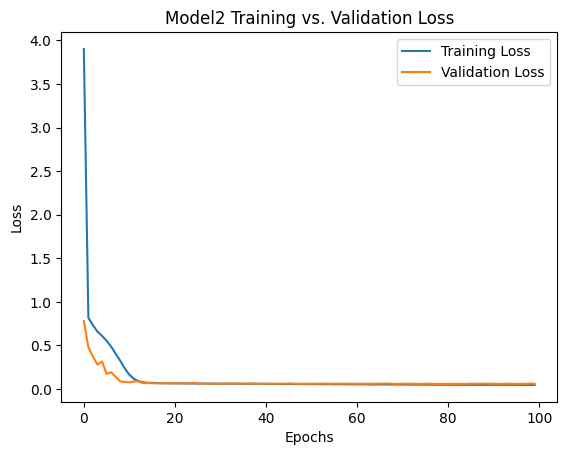

In [ ]:
# Hyperparameters
learning_rate = 0.001
batch_size = 64
epochs = 100

# Loss function (regression-friendly, robust to outliers)
criterion = nn.SmoothL1Loss()

# Optimizer
optimizer = optim.Adam(model_2.parameters(), lr=learning_rate)

# Train the model
train_losses, val_losses = train_model(epochs, model_2, optimizer, criterion, train_loader, val_loader)

# Plot the training and validation losses
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model2 Training vs. Validation Loss")
plt.show()

### Model 3

In [ ]:
# Define MLP for regression
class MLP_regression(nn.Module):
    def __init__(self):
        super(MLP_regression, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train_tensor.shape[1], 128),
            nn.LeakyReLU(),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 1),
        )

    def forward(self, x):
        return self.layers(x)

model_3 = MLP_regression().to(device)


#summary of model structure
summary(model_3, input_size=(X_train_tensor.shape))



print(X_train_tensor.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1           [-1, 20041, 128]          26,496
         LeakyReLU-2           [-1, 20041, 128]               0
            Linear-3            [-1, 20041, 64]           8,256
         LeakyReLU-4            [-1, 20041, 64]               0
            Linear-5             [-1, 20041, 1]              65
Total params: 34,817
Trainable params: 34,817
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 15.75
Forward/backward pass size (MB): 58.87
Params size (MB): 0.13
Estimated Total Size (MB): 74.75
----------------------------------------------------------------
torch.Size([20041, 206])


Epoch: 1, Training Loss: 22.7007, Validation Loss: 0.2353
Epoch: 2, Training Loss: 0.2018, Validation Loss: 0.1805
Epoch: 3, Training Loss: 0.1719, Validation Loss: 0.1638
Epoch: 4, Training Loss: 0.1595, Validation Loss: 0.1554
Epoch: 5, Training Loss: 0.1529, Validation Loss: 0.1519
Epoch: 6, Training Loss: 0.1490, Validation Loss: 0.1494
Epoch: 7, Training Loss: 0.1458, Validation Loss: 0.1507
Epoch: 8, Training Loss: 0.1443, Validation Loss: 0.1480
Epoch: 9, Training Loss: 0.1432, Validation Loss: 0.1463
Epoch: 10, Training Loss: 0.1419, Validation Loss: 0.1538
Epoch: 11, Training Loss: 0.1397, Validation Loss: 0.1468
Epoch: 12, Training Loss: 0.1384, Validation Loss: 0.1491
Epoch: 13, Training Loss: 0.1368, Validation Loss: 0.1462
Epoch: 14, Training Loss: 0.1344, Validation Loss: 0.1460
Epoch: 15, Training Loss: 0.1344, Validation Loss: 0.1551
Epoch: 16, Training Loss: 0.1339, Validation Loss: 0.1512
Epoch: 17, Training Loss: 0.1315, Validation Loss: 0.1506
Epoch: 18, Training Lo

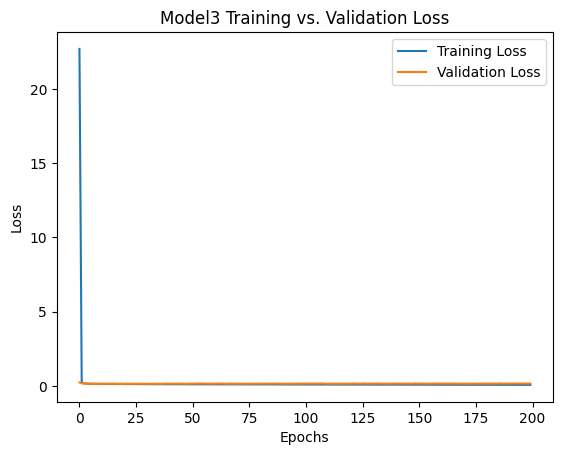

In [ ]:
#hyperparameter
#lr = 0.0005
lr = 0.001
batch_size = 64

#training parameters
epochs = 200

#Loss Function
criterion = nn.MSELoss()

# Instantiate optimizer and early stopper
optimizer = optim.Adam(model_3.parameters(), lr=lr)


# Run training and plot losses
train_losses_3, val_losses_3 = train_model(epochs, model_3, optimizer, criterion, train_loader, test_loader)
plt.plot(train_losses_3, label='Training Loss')
plt.plot(val_losses_3, label='Validation Loss')
plt.title("Model3 Training vs. Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 4. Model Evaluation and Selection 

In [ ]:

def evaluate_model_with_mape(model, dataloader):
    model.eval()
    predictions = []
    targets = []

    with torch.no_grad():
        for data, target in dataloader:
            data = data.to(device)
            target = target.to(device)

            output = model(data)

            # Flatten and store in lists
            predictions.extend(output.view(-1).cpu().numpy())
            targets.extend(target.view(-1).cpu().numpy())

    # Convert to NumPy arrays
    predictions = np.array(predictions)
    targets = np.array(targets)

    
    
    # Compute MAPE (add epsilon to avoid division by zero)
    epsilon = 1e-8
    mape = np.mean(np.abs((targets - predictions) / (targets + epsilon))) * 100

    
    return mape

### Model selection  

In [ ]:
mape1 = evaluate_model_with_mape(model_1, val_loader)
mape2 = evaluate_model_with_mape(model_2, val_loader)
mape3 = evaluate_model_with_mape(model_3, val_loader)

print(f"Model 1 MAPE: {mape1:.2f}%")
print(f"Model 2 MAPE: {mape2:.2f}%")
print(f"Model 3 MAPE: {mape3:.2f}%")

Model 1 MAPE: 2.59%
Model 2 MAPE: 2.40%
Model 3 MAPE: 2.81%


The performance of the models was evaluated using the Mean Absolute Percentage Error (MAPE). MAPE was chosen as it provides a scale-independent measure of prediction accuracy, which is particularly useful in regression tasks involving monetary values that span a wide range. Unlike metrics such as Mean Squared Error (MSE), MAPE expresses the error as a percentage, making it easier to interpret and compare across models.

Based on the validation set results, Model 2 achieved the lowest MAPE score (2.40\%), indicating superior predictive performance relative to the other architectures when evaluated using this metric. Therefore, Model 2 was selected as the final model for further testing and comparison.

# 5. Final Testing vs Linear Regression

In [ ]:
# final testing
print(f"Test data set MAPE: {evaluate_model_with_mape(model_1, test_loader):.2f}%")
print(f"Test data set MAPE: {evaluate_model_with_mape(model_2, test_loader):.2f}%")
print(f"Test data set MAPE: {evaluate_model_with_mape(model_3, test_loader):.2f}%")

Test data set MAPE: 2.57%
Test data set MAPE: 2.34%
Test data set MAPE: 2.75%


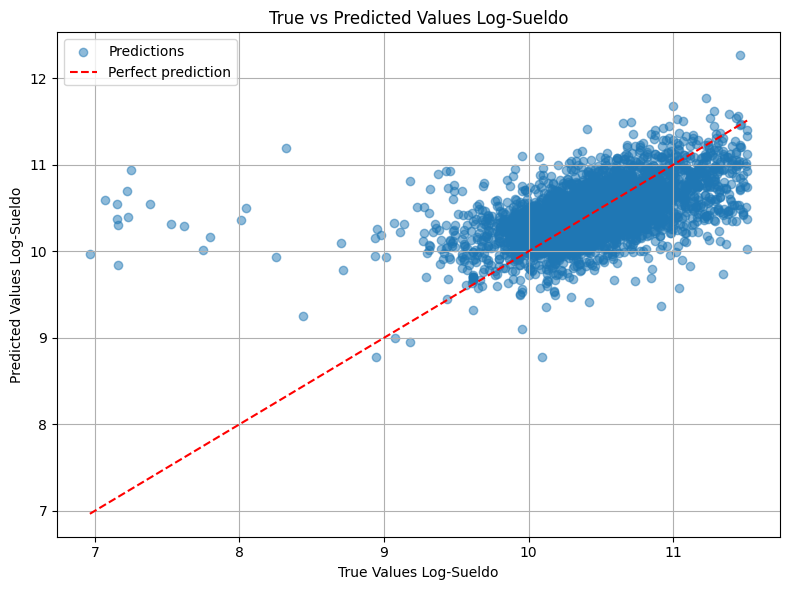

In [ ]:


# Collect predictions and true values
model_1.eval()
predictions = []
targets = []

with torch.no_grad():
    for data, target in test_loader:
        data = data.to(device)
        target = target.to(device)
        
        output = model_1(data)
        predictions.extend(output.view(-1).cpu().numpy())
        targets.extend(target.view(-1).cpu().numpy())

# Convert to numpy arrays
predictions = np.array(predictions)
targets = np.array(targets)

# Plot true vs predicted log-sueldo
plt.figure(figsize=(8, 6))
plt.scatter(targets, predictions, alpha=0.5, label="Predictions")
plt.plot([targets.min(), targets.max()],
         [targets.min(), targets.max()],
         'r--', label='Perfect prediction')  # y=x line

plt.xlabel("True Values Log-Sueldo")
plt.ylabel("Predicted Values Log-Sueldo")
plt.title("True vs Predicted Values Log-Sueldo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The figure presents the scatter plot of predicted versus true salary values (in logarithmic scale) on the test set using Model 2. The red dashed line represents the ideal case where the predictions perfectly match the true values. As seen in the figure, most predictions lie close to the diagonal, indicating that the model captures the overall distribution of salaries well.

While some deviation exists, particularly for extreme salary values, the concentration of points around the line suggests strong predictive performance and low systematic bias. This visual evidence aligns with the low MAPE obtained on the test set, further validating the effectiveness of Model 2.

### Linear regression

In [ ]:
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

# Convert PyTorch tensors to NumPy arrays
X_train_np = X_train_tensor.cpu().numpy()
y_train_np = y_train_tensor.view(-1).cpu().numpy()
X_test_np = X_test_tensor.cpu().numpy()
y_test_np = y_test_tensor.view(-1).cpu().numpy()

# Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled = scaler.transform(X_test_np)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_np)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluation metrics
mse_lr = mean_squared_error(y_test_np, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test_np, y_pred_lr)
r2_lr = r2_score(y_test_np, y_pred_lr)

# Compute MAPE (add small epsilon to avoid division by zero)
epsilon = 1e-8
mape_lr = np.mean(np.abs((y_test_np - y_pred_lr) / (y_test_np + epsilon))) * 100

# Print the results
print("\nLinear Regression Baseline Performance:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE:  {mae_lr:.2f}")
print(f"R²:   {r2_lr:.4f}")
print(f"MAPE: {mape_lr:.2f}%")



Linear Regression Baseline Performance:
RMSE: 847.41
MAE:  39.68
R²:   -3701267.4038
MAPE: 389.47%



To contextualize the performance of the neural network models, a standard Linear Regression model was trained and evaluated as a baseline. This model achieved a test MAPE of 389.47\%, which is significantly worse than the performance of the MLP models. The extremely high error indicates that the linear model was unable to capture the underlying non-linear relationships present in the data.

In contrast, Model 2—our best-performing MLP—achieved a test MAPE of only 2.34\%, demonstrating its superior ability to model complex patterns. This substantial gap underscores the effectiveness of using deep learning approaches over traditional linear methods for this salary prediction task.

# Bonus Task 1 Random Forest Regressor

In [ ]:
# combine train data with valudation data
X_rf = vstack([X_train_scaled, X_val_scaled])
y_rf = np.hstack([y_train, y_val])

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_rf, y_rf)

# Evaluate
rf_preds = rf.predict(X_test_scaled)
rf_mape = mean_absolute_percentage_error(y_test, rf_preds) * 100
print(f"Random Forest MAPE:, {rf_mape:.2f}%")

Random Forest MAPE: 0.02098615326354222


 The Random Forest achieved a test MAPE of 2.10\%, which outperformed all MLP models, including the best-performing Model 2 (2.34\%).

# Bonus Task 2 Model Ensemble

In [ ]:
# Put all models into evaluation mode
model_1.eval()
model_2.eval()
model_3.eval()

# Collect predictions
preds_1 = []
preds_2 = []
preds_3 = []
targets = []

with torch.no_grad():
    for data, target in test_loader:
        data = data.to(device)
        target = target.to(device)

        out1 = model_1(data)
        out2 = model_2(data)
        out3 = model_3(data)

        preds_1.extend(out1.view(-1).cpu().numpy())
        preds_2.extend(out2.view(-1).cpu().numpy())
        preds_3.extend(out3.view(-1).cpu().numpy())
        targets.extend(target.view(-1).cpu().numpy())

# Convert to numpy arrays
preds_1 = np.array(preds_1)
preds_2 = np.array(preds_2)
preds_3 = np.array(preds_3)
targets = np.array(targets)

# Average predictions (ensemble)
ensemble_preds = (preds_1 + preds_2 + preds_3) / 3

# Evaluate
#epsilon = 1e-8
#mae_ens = mean_absolute_error(targets, ensemble_preds)
mape_ens = np.mean(np.abs((targets - ensemble_preds) / (targets + epsilon))) * 100
#r2_ens = r2_score(targets, ensemble_preds)

# Print results
print("MLP Ensemble (3 mlps) Performance:")
#print(f"MAE:  {mae_ens:.2f}")
print(f"MAPE: {mape_ens:.2f}%")
#print(f"R²:   {r2_ens:.4f}")


MLP Ensemble (3 mlps) Performance:
MAPE: 2.39%


The ensemble underperformed compared to the Random Forest Regressor baseline, which achieved a significantly better MAPE of 2.10\%. The ensemble also performed slightly worse than the best individual model, Model 2, which achieved a lower test MAPE of 2.34\%.

# Bonus Task 3 Classification 

Let us denote salaries above 30k as 1, and salaries below 30k as 0.

In [ ]:
df_class = data_encoded.drop(columns=["log_sueldo"])
df_class["Sueldo"] = df["Sueldo"]
df_class["class"] = df_class["Sueldo"].apply(lambda x: 1 if x >= 30000 else 0)
df_class = df_class.drop(columns=["Sueldo"])

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_24832\2355729010.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_class["class"] = df_class["Sueldo"].apply(lambda x: 1 if x >= 30000 else 0)


In [ ]:
#df_class.to_csv("df_class.csv", index=False)